In [24]:
import networkx as nx
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

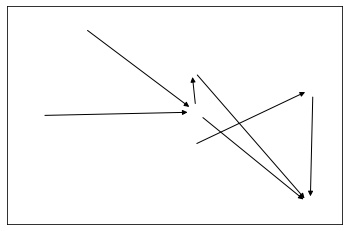

In [30]:
G = nx.DiGraph([(0, 3), (1, 3), (2, 4), (3, 5), (3, 6), (4, 6), (5, 6)])
pos=nx.spring_layout(G)

nx.draw_networkx_edges(G,pos)

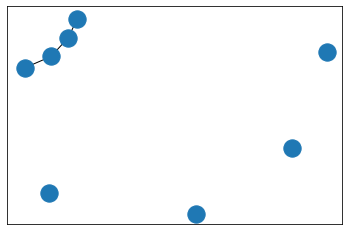

In [27]:
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)

In [11]:
accelerator = int(input('Select accelerator: Multithreading(1), multiprocessing(2) or none(3)'))

Select accelerator: Multithreading(1), multiprocessing(2) or none(3)1


In [12]:
accelerator

1

In [20]:
class stack:
   def __init__(self):
      self.arr = []
   def push(self, data):
      self.arr.append(data)
   def pop(self):
      try:
         return self.arr.pop(-1)
      except:
         pass
   def top(self):
      try:
         return self.arr[-1]
      except:
         pass
   def size(self):
      return len(self.arr)
# node class for expression tree
class node:
   def __init__(self, data):
      self.data = data
      self.left = None
      self.right = None
# expression tree class
class exp_tree:
   def __init__(self, postfix_exp):
      self.exp = postfix_exp
      self.root = None
      self.createTree(self.exp)
   def isOperator(self, char):
      optr = [" ", "-", "*", "/", "^", "+", "log10", "log", "sin", "cos"]
      if char in optr: # if given char is operator
         return True # then return true
      return False # else return false
   def createTree(self, exp):
      s = stack()
      # store those operator node whose any child node is NULL
      self.root = node(exp[-1])
      # last character of postfix expression is always an operator
      s.push(self.root)
      # travel on rest of the postfix expression
      for i in "".join(reversed(exp[:-1])):
         curr_node = s.top()
         if not curr_node.right:
            # if right node of current node is NULL
            temp = node(i)
            curr_node.right = temp
            if self.isOperator(i):
               s.push(temp)
         else: # if left node of current node is NULL
            temp = node(i)
            curr_node.left = temp
            # if no child node of current node is NULL
            s.pop() # pop current from stack
            if self.isOperator(i):
               s.push(temp)
   def inorder(self, head):
      # inorder traversal of expression tree
      # inorder traversal = > left, root, right
      if head.left:
         self.inorder(head.left)
      print(head.data, end=" ")
      if head.right:
         self.inorder(head.right)
   def infixExp(self):
      # inorder traversal of expression tree give infix expression
      self.inorder(self.root)
      print()
if __name__ == "__main__":
   postfixExp = "x*(x+48)"
   et = exp_tree(postfixExp)
   et.infixExp()

AttributeError: 'NoneType' object has no attribute 'right'

In [44]:
from pythonds.basic import Stack
from pythonds.trees import BinaryTree

def buildParseTree(fpexp):
#     fplist = [i for i in fpexp]
    fplist = fpexp.split()
    pStack = Stack()
    eTree = BinaryTree('')
    pStack.push(eTree)
    currentTree = eTree

    for i in fplist:
        if i == '(':
            currentTree.insertLeft('')
            pStack.push(currentTree)
            currentTree = currentTree.getLeftChild()

        elif i in ['+', '-', '*', '/', 'x']:
            currentTree.setRootVal(i)
            currentTree.insertRight('')
            pStack.push(currentTree)
            currentTree = currentTree.getRightChild()

        elif i == ')':
            currentTree = pStack.pop()

        elif i not in ['+', '-', '*', '/', ')']:
            try:
                currentTree.setRootVal(int(i))
                parent = pStack.pop()
                currentTree = parent

            except ValueError:
                raise ValueError("token '{}' is not a valid integer".format(i))

    return eTree

pt = buildParseTree("x * ( x + 48 )")
pt.postorder()  #defined and explained in the next section

48
+
x

*
x
